<a href="https://colab.research.google.com/github/mariahirit/ML-RegresionLineal/blob/master/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dat_mar=pd.read_csv("MarathonData.csv")
dat_mar

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


In [ ]:
dat_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [ ]:
dat_mar.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [ ]:
dat_mar.shape

(87, 10)

In [ ]:
dat_mar.describe()

,id,km4week,sp4week,MarathonTime
count,87.000000,87.000000,87.000000,87.000000
mean,44.000000,62.347126,139.840706,3.319080
std,25.258662,26.956019,1191.427864,0.376923
min,1.000000,17.900000,8.031414,2.370000
25%,22.500000,44.200000,11.498168,3.045000
50%,44.000000,58.800000,12.163424,3.320000
75%,65.500000,77.500000,12.854036,3.605000
max,87.000000,137.500000,11125.000000,3.980000


In [ ]:
dat_mar["Category"]

0     MAM
1     MAM
2     MAM
3     M45
4     MAM
     ... 
82    M55
83    M40
84    M40
85    M45
86    M40
Name: Category, Length: 87, dtype: object

In [ ]:
dat_mar["Wall21 "]=pd.to_numeric(dat_mar["Wall21"], errors="coerce")

In [ ]:
dat_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
 10  Wall21         81 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 7.6+ KB


In [ ]:
dat_mar.describe()

,id,km4week,sp4week,MarathonTime,Wall21
count,87.000000,87.000000,87.000000,87.000000,81.000000
mean,44.000000,62.347126,139.840706,3.319080,1.630617
std,25.258662,26.956019,1191.427864,0.376923,0.210490
min,1.000000,17.900000,8.031414,2.370000,1.160000
25%,22.500000,44.200000,11.498168,3.045000,1.450000
50%,44.000000,58.800000,12.163424,3.320000,1.620000
75%,65.500000,77.500000,12.854036,3.605000,1.760000
max,87.000000,137.500000,11125.000000,3.980000,2.050000


In [ ]:
dat_mar["CrossTraining "]=pd.to_numeric(dat_mar["CrossTraining"], errors="coerce")

In [ ]:
dat_mar.describe()

,id,km4week,sp4week,MarathonTime,Wall21,CrossTraining
count,87.000000,87.000000,87.000000,87.000000,81.000000,0.0
mean,44.000000,62.347126,139.840706,3.319080,1.630617,NaN
std,25.258662,26.956019,1191.427864,0.376923,0.210490,NaN
min,1.000000,17.900000,8.031414,2.370000,1.160000,NaN
25%,22.500000,44.200000,11.498168,3.045000,1.450000,NaN
50%,44.000000,58.800000,12.163424,3.320000,1.620000,NaN
75%,65.500000,77.500000,12.854036,3.605000,1.760000,NaN
max,87.000000,137.500000,11125.000000,3.980000,2.050000,NaN


In [ ]:
dat_mar.isnull().sum()

id                 0
Marathon           0
Name               0
Category           6
km4week            0
sp4week            0
CrossTraining     74
Wall21             0
MarathonTime       0
CATEGORY           0
Wall21             6
CrossTraining     87
dtype: int64

In [ ]:
dat_mar["CrossTraining"] = dat_mar["CrossTraining"].fillna(0)
dat_mar

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,Wall21,CrossTraining
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,0,1.16,2.37,A,1.16,NaN
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,0,1.23,2.59,A,1.23,NaN
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,0,1.30,2.66,A,1.30,NaN
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,0,1.32,2.68,A,1.32,NaN
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,0,1.36,2.74,A,1.36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,0,2.02,3.93,D,2.02,NaN
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D,1.94,NaN
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,0,1.94,3.94,D,1.94,NaN
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,0,2.05,3.95,D,2.05,NaN


In [ ]:
dat_mar = dat_mar.drop(columns=['Name'])

dat_mar

,id,Marathon,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,Wall21,CrossTraining
0,1,Prague17,MAM,132.8,14.434783,0,1.16,2.37,A,1.16,NaN
1,2,Prague17,MAM,68.6,13.674419,0,1.23,2.59,A,1.23,NaN
2,3,Prague17,MAM,82.7,13.520436,0,1.30,2.66,A,1.30,NaN
3,4,Prague17,M45,137.5,12.258544,0,1.32,2.68,A,1.32,NaN
4,5,Prague17,MAM,84.6,13.945055,0,1.36,2.74,A,1.36,NaN
...,...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,M55,50.0,10.830325,0,2.02,3.93,D,2.02,NaN
83,84,Prague17,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D,1.94,NaN
84,85,Prague17,M40,55.4,11.043189,0,1.94,3.94,D,1.94,NaN
85,86,Prague17,M45,33.2,11.066667,0,2.05,3.95,D,2.05,NaN


In [ ]:
dat_mar=pd.read_csv("MarathonData.csv")
dat_mar

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


In [ ]:
dat_mar.describe()

,id,km4week,sp4week,MarathonTime
count,87.000000,87.000000,87.000000,87.000000
mean,44.000000,62.347126,139.840706,3.319080
std,25.258662,26.956019,1191.427864,0.376923
min,1.000000,17.900000,8.031414,2.370000
25%,22.500000,44.200000,11.498168,3.045000
50%,44.000000,58.800000,12.163424,3.320000
75%,65.500000,77.500000,12.854036,3.605000
max,87.000000,137.500000,11125.000000,3.980000


In [ ]:
dat_mar.isna().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [ ]:
dat_mar.isnull().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [ ]:
dat_mar.describe()

,id,km4week,sp4week,MarathonTime
count,87.000000,87.000000,87.000000,87.000000
mean,44.000000,62.347126,139.840706,3.319080
std,25.258662,26.956019,1191.427864,0.376923
min,1.000000,17.900000,8.031414,2.370000
25%,22.500000,44.200000,11.498168,3.045000
50%,44.000000,58.800000,12.163424,3.320000
75%,65.500000,77.500000,12.854036,3.605000
max,87.000000,137.500000,11125.000000,3.980000


In [ ]:
dat_mar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [ ]:
dat_mar=pd.read_csv("MarathonData.csv")
dat_mar

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


In [ ]:
dat_mar.isna().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [ ]:
dat_mar["CrossTraining"] = dat_mar["CrossTraining"].fillna(0)
dat_mar

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,0,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,0,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,0,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,0,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,0,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,0,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,0,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,0,2.05,3.95,D


In [ ]:
dat_mar["Category"] = dat_mar["Category"].fillna(0)
dat_mar

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,0,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,0,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,0,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,0,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,0,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,0,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,0,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,0,2.05,3.95,D


In [ ]:
dat_mar = dat_mar.dropna(how='any')
dat_mar

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,0,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,0,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,0,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,0,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,0,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,0,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,0,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,0,2.05,3.95,D


In [ ]:
dat_mar['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 5h',
       'ciclista 3h'], dtype=object)

In [ ]:
valores_cross = {"CrossTraining":  {'ciclista 1h':1, 'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5}}
dat_mar.replace(valores_cross, inplace=True)
dat_mar

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,0,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,0,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,0,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,0,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,0,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,0,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,2,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,0,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,0,2.05,3.95,D


In [ ]:
dat_mar['CrossTraining'].unique()

array([0, 1, 3, 5, 4, 2])

In [ ]:
dat_mar['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 0, 'WAM'], dtype=object)

In [ ]:
valores_categoria = {"Category":  {'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5,'WAM':6}}
dat_mar.replace(valores_categoria, inplace=True)
dat_mar

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,1,132.8,14.434783,0,1.16,2.37,A
1,2,Prague17,Robert Heczko,1,68.6,13.674419,0,1.23,2.59,A
2,3,Prague17,Michon Jerome,1,82.7,13.520436,0,1.30,2.66,A
3,4,Prague17,Daniel Or lek,2,137.5,12.258544,0,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,1,84.6,13.945055,0,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,5,50.0,10.830325,0,2.02,3.93,D
83,84,Prague17,Andrej Madliak,3,33.6,10.130653,2,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,3,55.4,11.043189,0,1.94,3.94,D
85,86,Prague17,Simon Dunn,2,33.2,11.066667,0,2.05,3.95,D


In [ ]:
dat_mar['Wall21'] = pd.to_numeric(dat_mar['Wall21'],errors='coerce')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55dacbe450>,
      dtype=object)

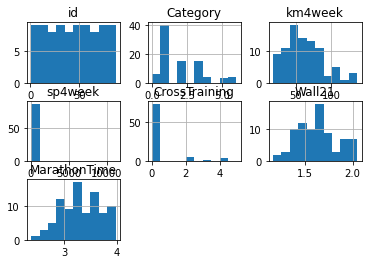

In [ ]:
dat_mar.hist()

In [ ]:
dat_mar = dat_mar.drop(columns=['Name'])
dat_mar = dat_mar.drop(columns=['id'])
dat_mar = dat_mar.drop(columns=['Marathon'])
dat_mar = dat_mar.drop(columns=['CATEGORY'])
dat_mar

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


In [ ]:
dat_mar["Wall21"] = dat_mar["Wall21"].fillna(0)
dat_mar

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


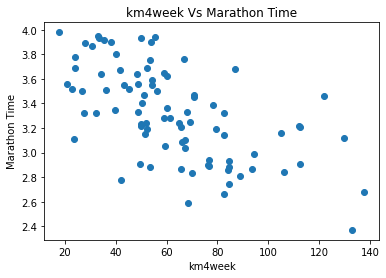

In [ ]:
plt.scatter(x = dat_mar['km4week'], y=dat_mar['MarathonTime'])
plt.title('km4week Vs Marathon Time')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()

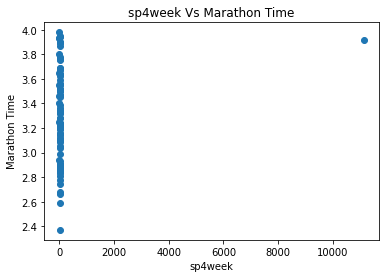

In [ ]:
plt.scatter(x = dat_mar['sp4week'], y=dat_mar['MarathonTime'])
plt.title('sp4week Vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

In [ ]:
dat_mar = dat_mar.query('sp4week<1000')

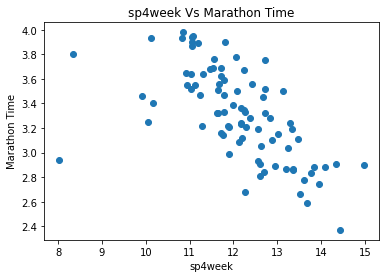

In [ ]:
plt.scatter(x = dat_mar['sp4week'], y=dat_mar['MarathonTime'])
plt.title('sp4week Vs Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

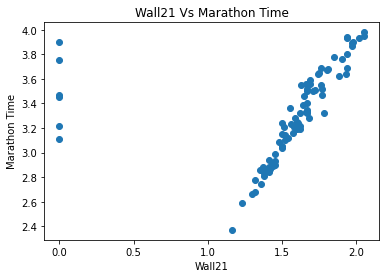

In [ ]:
plt.scatter(x = dat_mar['Wall21'], y=dat_mar['MarathonTime'])
plt.title('Wall21 Vs Marathon Time')
plt.xlabel('Wall21')
plt.ylabel('Marathon Time')
plt.show()

FASE 2. Entrenamiento del modelo

Separamos los datos entre entrenamiento (80%) y test (20%)

In [ ]:
datos_entrenamiento = dat_mar.sample(frac=0.8,random_state=0)
datos_test = dat_mar.drop(datos_entrenamiento.index)

In [ ]:
datos_entrenamiento


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
2,1,82.7,13.520436,0,1.30,2.66
13,3,84.4,13.836066,0,1.41,2.88
53,0,51.1,11.230769,0,0.00,3.47
41,5,58.8,12.829091,0,1.68,3.28
74,1,66.7,11.566474,0,1.90,3.76
...,...,...,...,...,...,...
29,4,104.9,11.720670,0,1.57,3.16
49,1,78.2,12.000000,0,1.64,3.39
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


In [ ]:
datos_test

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
9,2,84.2,13.365079,0,1.35,2.86
12,2,53.5,14.078947,3,1.37,2.88
21,3,67.3,13.239344,0,1.50,3.04
25,0,23.8,13.471698,4,0.00,3.11
36,1,50.1,12.170040,0,1.56,3.23
37,2,52.1,12.163424,0,1.61,3.24
39,6,69.2,10.053269,0,1.60,3.25
44,3,27.7,11.622378,2,1.67,3.32
46,6,48.6,12.252101,0,1.66,3.33
47,2,39.6,12.247423,0,1.67,3.35


In [ ]:
etiquetas_entrenamiento = datos_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')

In [ ]:
etiquetas_entrenamiento

2     2.66
13    2.88
53    3.47
41    3.28
74    3.76
      ... 
29    3.16
49    3.39
84    3.94
85    3.95
20    2.99
Name: MarathonTime, Length: 69, dtype: float64

In [ ]:
etiquetas_test

9     2.86
12    2.88
21    3.04
25    3.11
36    3.23
37    3.24
39    3.25
44    3.32
46    3.33
47    3.35
58    3.52
64    3.59
65    3.62
67    3.64
70    3.68
80    3.90
83    3.93
Name: MarathonTime, dtype: float64

In [ ]:
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21
2,1,82.7,13.520436,0,1.30
13,3,84.4,13.836066,0,1.41
53,0,51.1,11.230769,0,0.00
41,5,58.8,12.829091,0,1.68
74,1,66.7,11.566474,0,1.90
...,...,...,...,...,...
29,4,104.9,11.720670,0,1.57
49,1,78.2,12.000000,0,1.64
84,3,55.4,11.043189,0,1.94
85,2,33.2,11.066667,0,2.05


Vamos a entrenar nuestro modelo, una regresion lineal muy simple!

In [ ]:
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#modelo = DecisionTreeRegressor(max_depth= 5)
modelo = LinearRegression()
modelo.fit(datos_entrenamiento,etiquetas_entrenamiento)

LinearRegression()

In [ ]:
predicciones = modelo.predict(datos_test)
predicciones

array([2.9669267 , 3.06476205, 3.13907673, 3.29556032, 3.39390114,
       3.40124706, 3.67226436, 3.6724939 , 3.49654118, 3.48532916,
       3.52063616, 3.46554719, 3.41540907, 3.65029894, 3.24605506,
       3.5931003 , 3.861816  ])

Los comparo con el valor **real**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
#error = np.arange(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 22.174304


In [ ]:
nuevo_corredor = pd.DataFrame(np.array([[1,100,15,0,1.4]]),columns=['Category', 'km4week','sp4week', 'CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,100.0,15.0,0.0,1.4


In [ ]:
modelo.predict(nuevo_corredor)

array([2.5792791])